Kenan Stredic

# KMeans Clustering Lab - CS 4372

In this lab, we will apply the K-means algorithm on synthetic as well as real dataset and also learn about machine learning pipelines.

You will need to complete the steps mentioned below and turn in the completed notebook. You can share the link of the finished notebook.

# Generate Synthetic Dataset Suitable For Clustering
We will use the following snippet to load libraries and generate some synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


Let's plot this 2-D dataset

<Axes: >

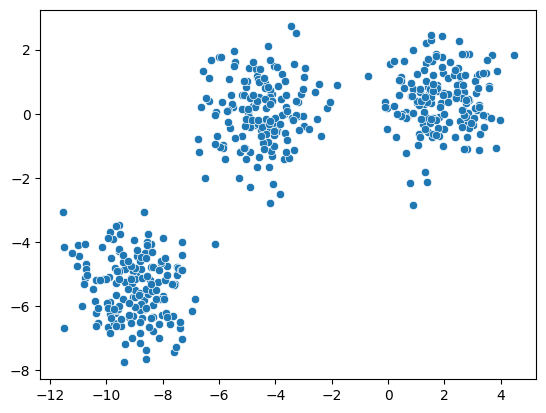

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1])

Now, it's your turn to create a synthetic dataset of 3 dimensions consisting of three clusters. You will also need to visualize this data using a 3-D plot. You can use any suitable library.

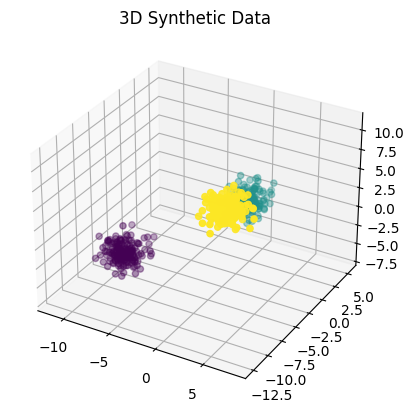

In [4]:
# TODO: Create a 3 feature dataset generated using 3 clusters and plot it.
from mpl_toolkits.mplot3d import Axes3D

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, n_features=3, centers=3, random_state=random_state)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.title("3D Synthetic Data")
plt.show()

## Clustering using k-means

Let's go back to the 2-D dataset generated earlier and let's try to cluster it using k-means. We know how many clusters are *actually* there.

In [5]:
predicted_clusters = 5 # need to play with this to get the correct value
max_iter = 100
random_state = 42

km = KMeans(n_clusters=predicted_clusters, random_state=random_state, max_iter=max_iter)

In [6]:
km

KMeans(max_iter=100, n_clusters=5, random_state=42)

In [7]:
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualization of Clusters

Let's create side-by-side plots of actual vs clustered data
for the clustered data, we also want to include the predicted centers

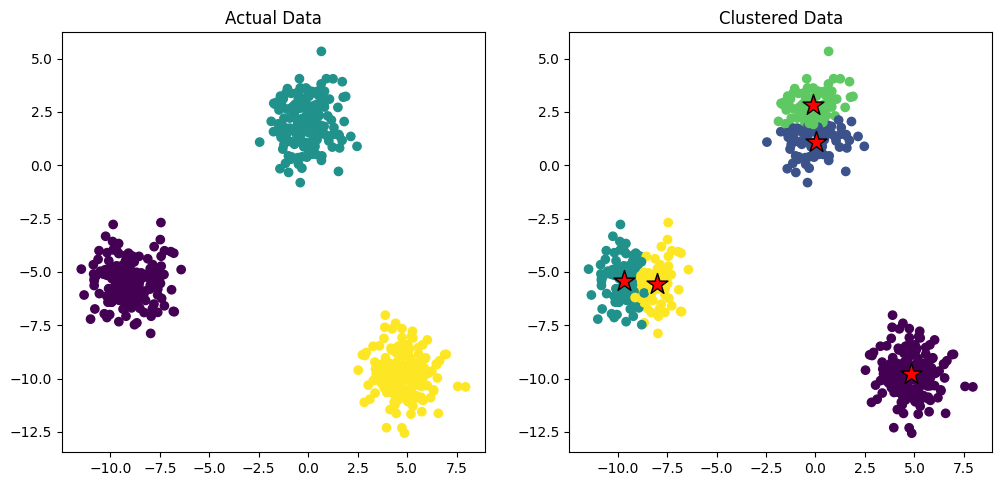

In [8]:


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Data")

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

## WCSS and Silhouette Score

Let's compute the evaluation criteria for clustering: WCSS and Silhouette score

In [9]:
km.inertia_

1143.8886192176203

In [10]:
silhouette_score(X, y_pred)

0.44376673521119253

## Finding Best Hyperparameters

We want to automatically try various values of the hyperparameter k and obtain the evaluation criteria to see which values are the best.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

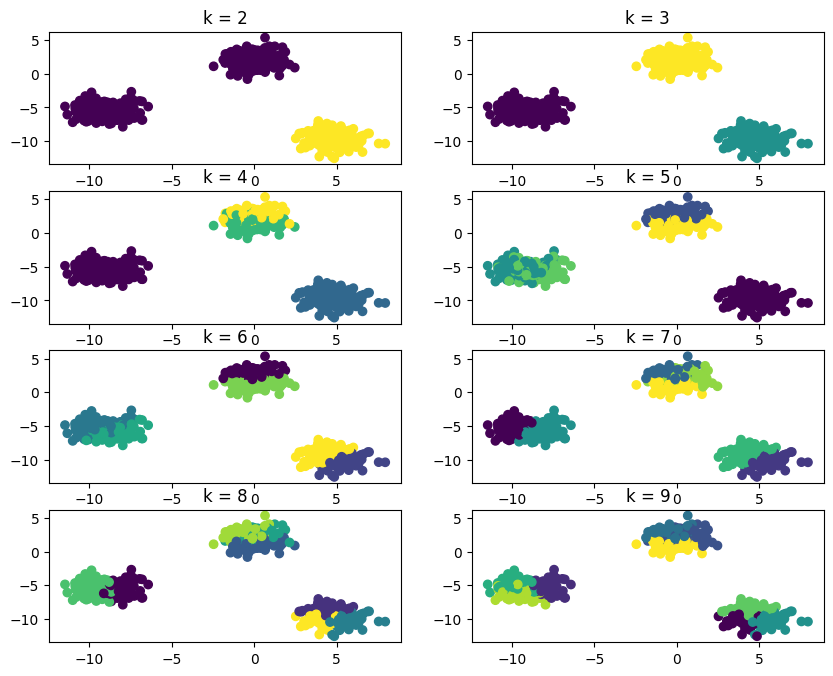

In [11]:
plt.figure(figsize=(10, 10))

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  plt.subplot(5, 2, i)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("k = " + str(k))
  i = i + 1

plt.show()

Now, try to find the WCSS and Silhouette width for each value of k and plot them. Which seems to be the best value for k?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

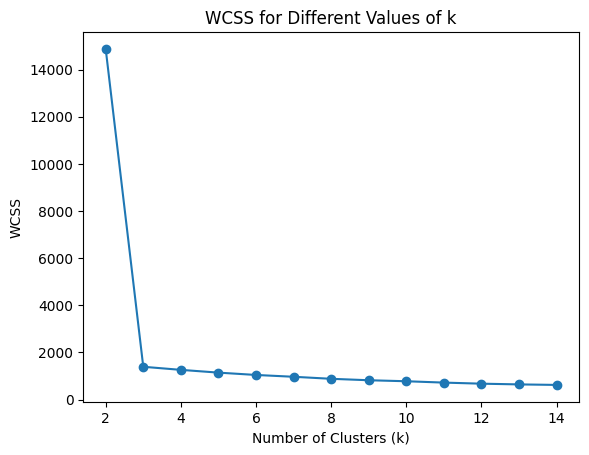

In [14]:
# TODO: Code what is stated above.
WCSS = []
i = 0
for k in range(2, 15):
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(X)
    WCSS.append(km.inertia_)
    i = i + 1

plt.plot(range(2, 15), WCSS, marker='o')
plt.title("WCSS for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Working with the California Housing Dataset

Download the California housing dataset

In [16]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/housing_clustering.csv")

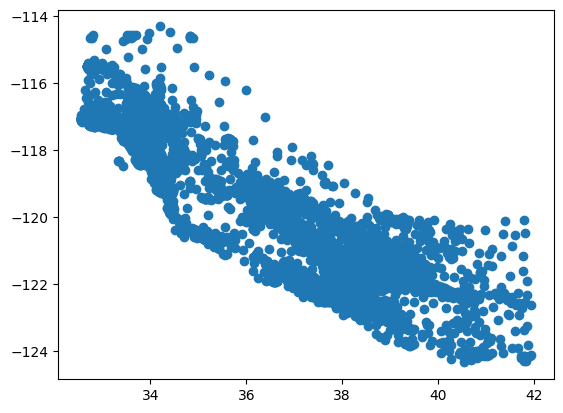

In [17]:
#TODO: Make a scatter plot of latitude and longitude
X = housing['latitude']
y = housing['longitude']
plt.scatter(X, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


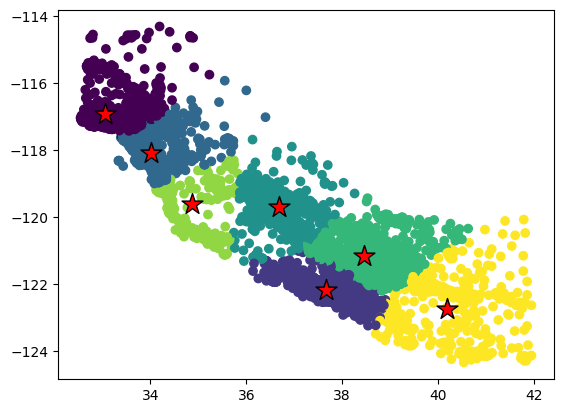

In [18]:
#TODO: Perform K-Means clustering and check if the centers resemble the location of major cities/areas in California
k = 7
my_cols = housing[['latitude','longitude']]

km = KMeans(n_clusters=k)
km.fit_transform(my_cols)

X = housing['latitude']
y = housing['longitude']
plt.scatter(X, y, c=km.labels_)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

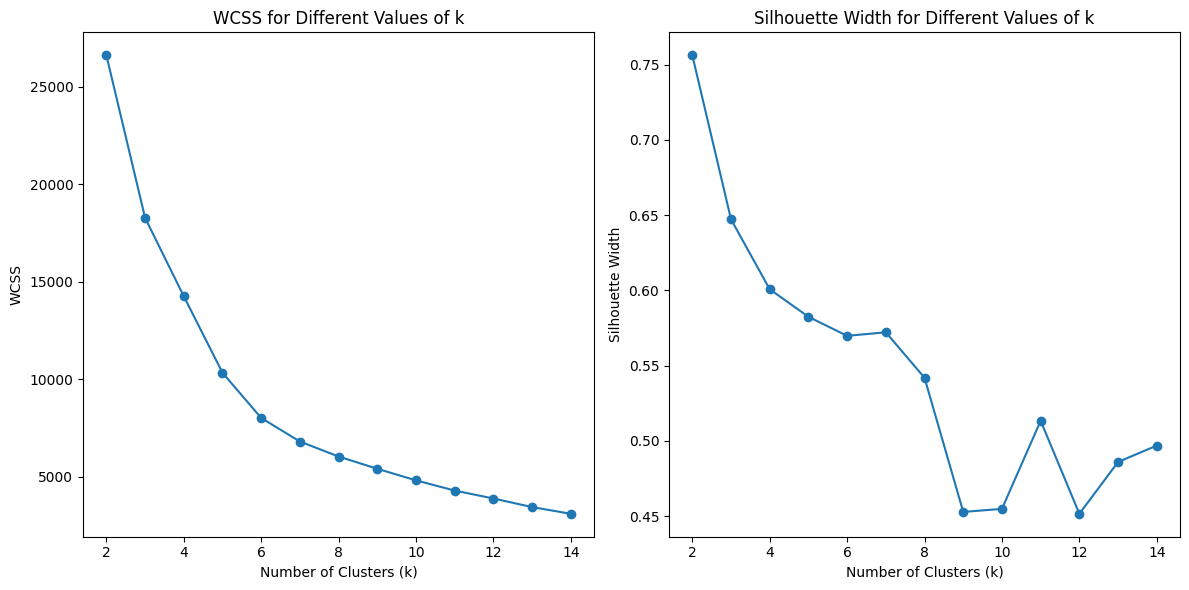

In [19]:
#TODO: Using WCSS or Silhouette Width, find best value of K
WCSS = []
Silhouette_Width = []

for k in range(2, 15):
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(my_cols)
    WCSS.append(km.inertia_)
    Silhouette_Width.append(silhouette_score(my_cols, y_pred))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 15), WCSS, marker='o')
plt.title("WCSS for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(range(2, 15), Silhouette_Width, marker='o')
plt.title("Silhouette Width for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Width")

plt.tight_layout()
plt.show()

## Working with US Arrests Data and Pipelines

Let's read the USArrests data that can be downloaded from:

https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv


In [20]:
# TODO: Read in the file to a dataframe and ensure everything is loaded properly
arrests = pd.read_csv("https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv", index_col=0)

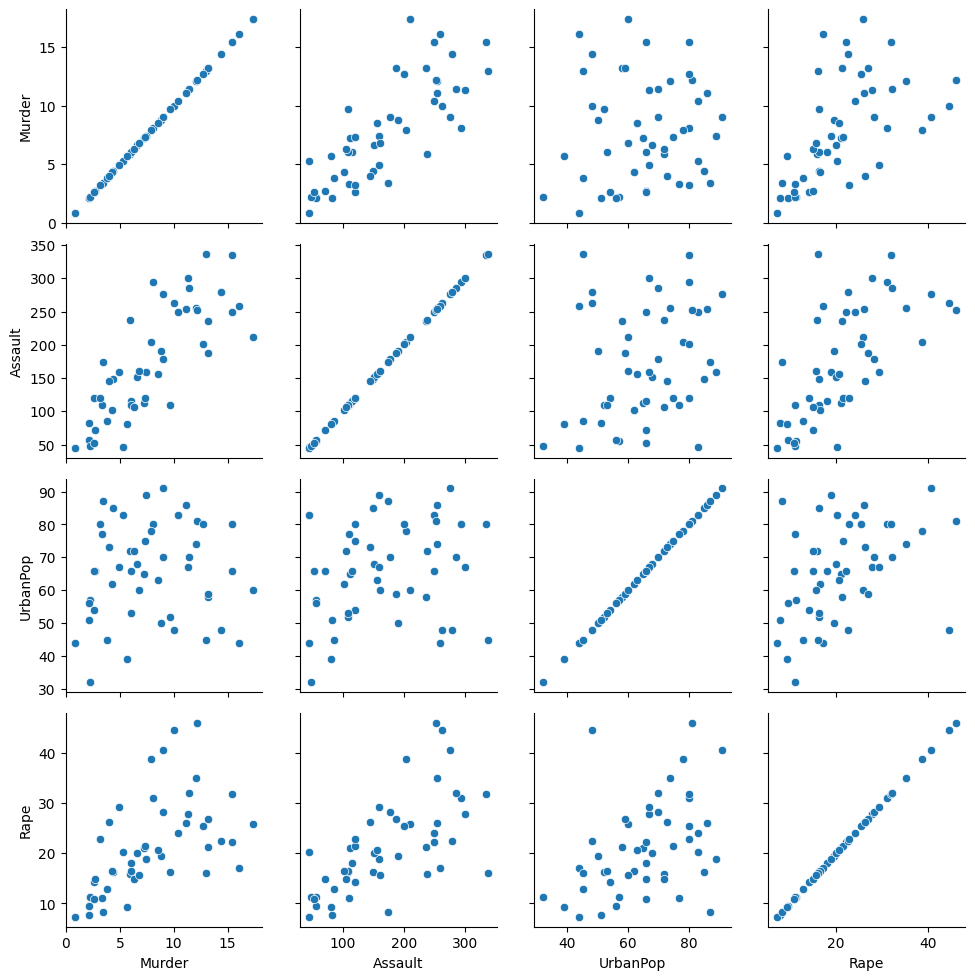

In [21]:
# TODO: Create a pairwise scatter plot and visualize relationships between variables
# https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
g = sns.PairGrid(arrests)
g.map(sns.scatterplot)

In [22]:
# TODO: Let's create a pipeline of scaler and then k-means and use it on the dataset
kmeansPipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("kmeans", KMeans(n_clusters=4, max_iter=500)),
    ]
)

In [26]:
# TODO: apply the pipeline on the data
kmeansPipeline.fit_transform(arrests)
kmeansPipeline.predict(arrests)
arrests['label'] = kmeansPipeline.predict(arrests)
arrests.sort_values('label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Murder,Assault,UrbanPop,Rape,label
Missouri,9.0,178,70,28.2,0
Washington,4.0,145,73,26.2,0
Virginia,8.5,156,63,20.7,0
Utah,3.2,120,80,22.9,0
Rhode Island,3.4,174,87,8.3,0
Pennsylvania,6.3,106,72,14.9,0
Oregon,4.9,159,67,29.3,0
Oklahoma,6.6,151,68,20.0,0
Ohio,7.3,120,75,21.4,0
New Jersey,7.4,159,89,18.8,0


In [27]:
# TODO: try various values of k and check which value of k may be the best
best_k = None
best_silhouette = -1

for k in range(2, 15):
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(arrests)
    silhouette = silhouette_score(arrests, y_pred)
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_k = k

print(f"The best value of k is {best_k} with a Silhouette score of {best_silhouette}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The best value of k is 2 with a Silhouette score of 0.5924913639193622


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# TODO: I would like to see which states belong to which cluster. Output that data in a suitable format.
clusters = arrests.groupby('label')
print("States in Each Cluster:")
for label, group in clusters:
    print(f"Cluster {label}: {', '.join(group.index)}")

States in Each Cluster:
Cluster 0: Connecticut, Delaware, Hawaii, Indiana, Kansas, Massachusetts, Missouri, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming
Cluster 1: Alaska, Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas
Cluster 2: Alabama, Arkansas, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee
Cluster 3: Idaho, Iowa, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin


In [31]:
#TODO: I would like to live in a state that is different in crime from TX. What choices do I have? Which states have lowest crime profiles?
tx_cluster = arrests.loc['Texas']['label']
dissimilar_states = arrests[arrests['label'] != tx_cluster].index.tolist()
print(f"States with different crime profiles than Texas: {', '.join(dissimilar_states)}")

States with different crime profiles than Texas: Alabama, Arkansas, Connecticut, Delaware, Georgia, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Massachusetts, Minnesota, Mississippi, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming
